In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import networkx as nx
import scipy.stats as stats
from itertools import product

In [3]:
def center(z):
    mask1 = (z==-1).sum(axis=0)
    mask2 = (z==-1).sum(axis=1)
    max1 = mask1.max()
    max2 = mask2.max()
    boundary1 = np.argwhere(mask1 == max1).flatten()
    boundary2 = np.argwhere(mask2==max2).flatten()
    lb1 = np.argmax(np.diff(boundary1))
    lb2 = np.argmax(np.diff(boundary2))
    minb_1, maxb_1 = boundary1[lb1],boundary1[lb1+1] #lateral figure
    minb_2, maxb_2 = boundary2[lb2],boundary2[lb2+1]
    xc = (minb_1+maxb_1)/2
    yc = (minb_2+maxb_2)/2
    radius_x = (maxb_1-minb_1)/2
    radius_y = (maxb_2-minb_2)/2
    return xc,yc,radius_x,radius_y

In [4]:
def bin_log(data, bins=50):
    if(type(bins) is int):
        binning = np.logspace(0,np.log10(np.max(data)), bins)
    else:
        binning = bins
    hist, edges = np.histogram(data,bins=binning, density=True)
    mask = hist > 0
    hist = hist[mask]
    edges = ((edges[0:-1]+edges[1:])*0.5)[mask]
    return hist, edges, binning

In [5]:
filename='interface0.13.pkl'
with open(filename, 'rb') as f:
    interface_dict, x_dict, y_dict, t_dict = pickle.load(f)

In [6]:
def build_network(xs,ys,times,time_cut,tol=2):
    network = {}
    for idx, (t,x,y) in enumerate(zip(times,xs,ys)):
        network[t] = []
        for (s,u,v) in zip(times[idx+1:],xs[idx+1:],ys[idx+1:]):
            if((s-t)>time_cut):
                break
            if(np.min(np.abs(x.reshape(-1,1)-u.reshape(1,-1))+np.abs(y.reshape(-1,1)-v.reshape(1,-1))) <=tol):
                network[t].append(s)
    return network

In [7]:
def get_avalanches(x_dict, y_dict, clusters):
    S = []
    for c in clusters:
        x_uq = []
        y_uq = []
        for idx in c:
            x_uq.append(x_dict[idx])
            y_uq.append(y_dict[idx])
        z = np.vstack((np.concatenate(x_uq),np.concatenate(y_uq))).T
        z = np.unique(z,axis=0)
        S.append(z.shape[0])
    return np.array(S)

In [78]:
def summary_stat(interface_dict, x_dict,y_dict,clusters):
    jumps = []
    lateral = []
    for c in clusters:
        temp = 0
        lengths = []
        angulars = []
        for idx in c:
            if(idx > 0):
                delta = interface_dict[idx]-interface_dict[idx-1]
                sites = np.nonzero(delta>0)[0]
                temp += np.sum(delta)
            else:
                temp += np.sum(interface_dict[0])
                sites = np.nonzero(interface_dict[0])[0]
            lengths.append(interface_dict[idx][sites].mean()*len(sites))
            angulars.append(len(sites))
        lateral.append(np.max(angulars))  
        jumps.append(temp)
    return np.array(jumps), np.array(lateral)

TypeError: object of type 'numpy.int64' has no len()

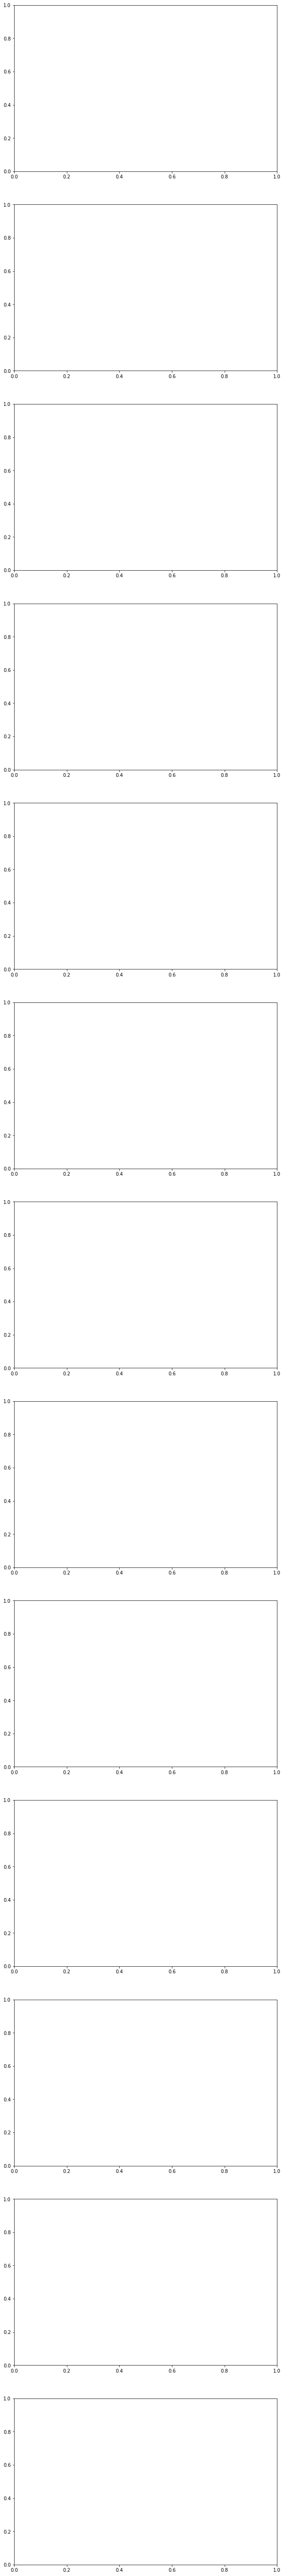

In [64]:
fig, ax = plt.subplots(nrows=len(time_cuts),figsize=(10,100))
for i,j in product(range(len(time_cuts)),range(len(tols))):
    jumps,lateral = summary_stat(interface_dict, x_dict,y_dict,cl_coll[i][j])
    hist, edges, _ = bin_log(jumps[5000:])
    ax[i].scatter(edges,hist)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
plt.show()

2


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


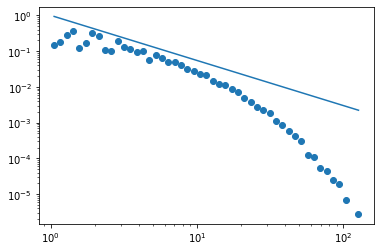

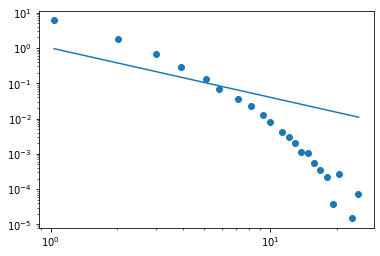

3


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


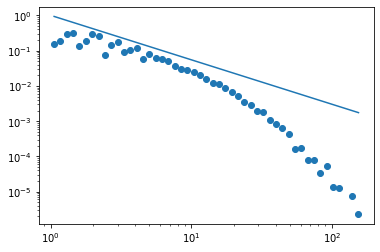

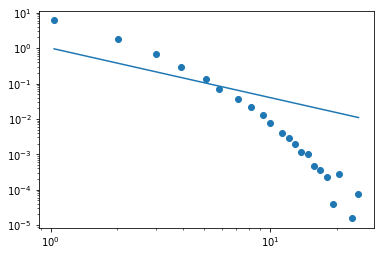

4


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


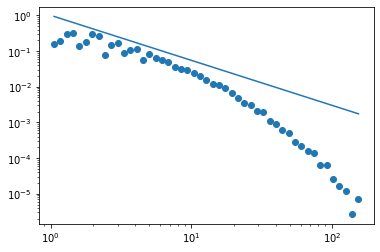

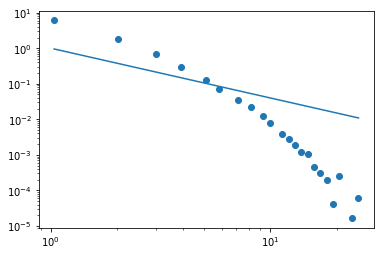

5


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


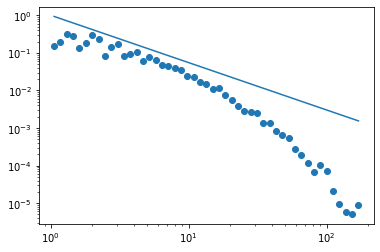

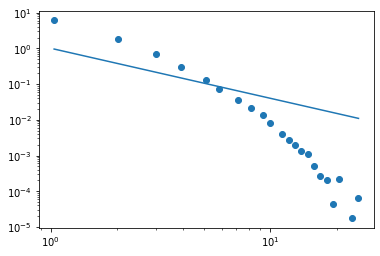

6


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


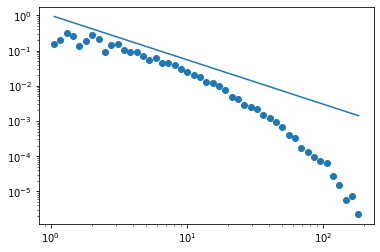

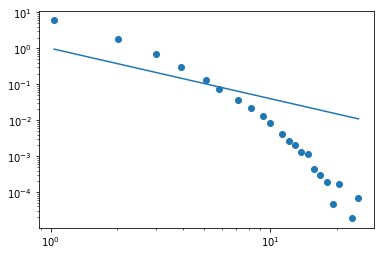

7


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


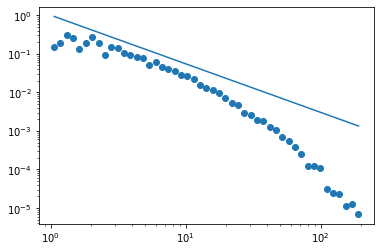

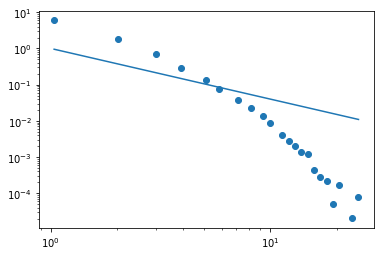

8


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


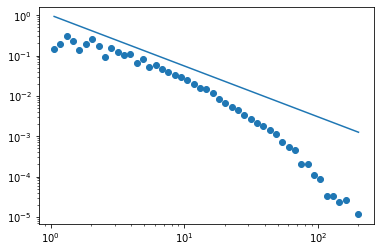

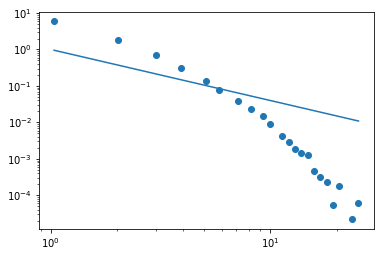

10


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


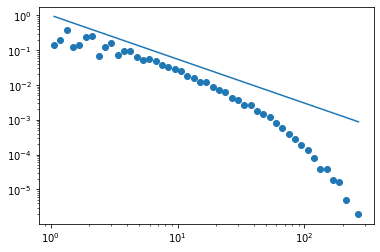

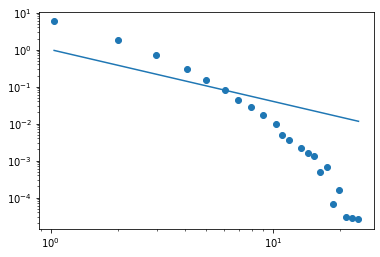

12


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


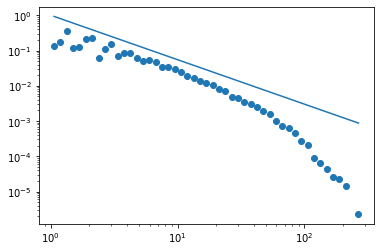

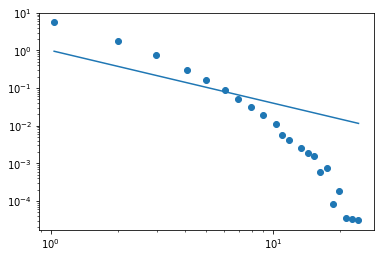

14


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


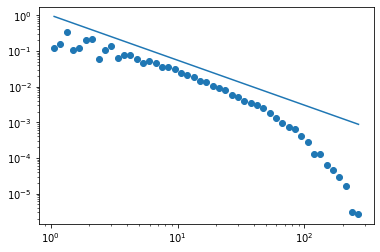

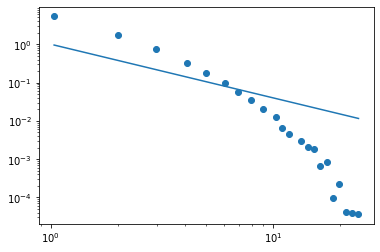

16


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


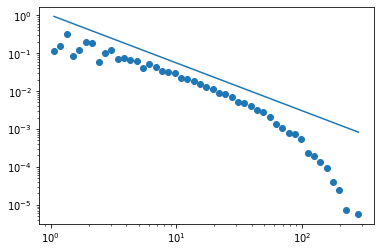

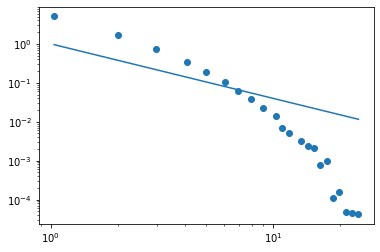

18


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


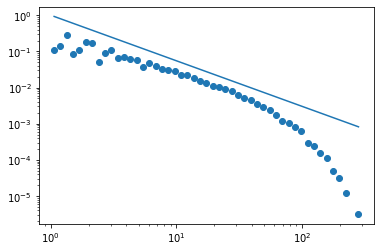

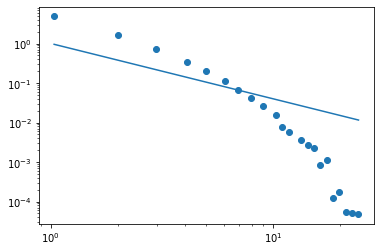

20


<ipython-input-78-b4d9c760abe8>:16: RuntimeWarning: Mean of empty slice.
  lengths.append(interface_dict[idx][sites].mean()*len(sites))
/home/vicio/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


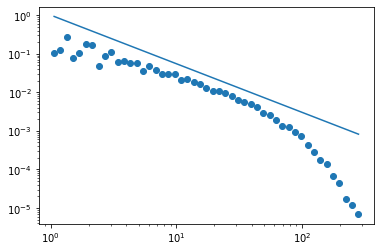

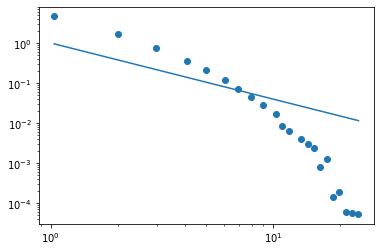

In [80]:
%matplotlib inline
for i in range(len(time_cuts)):
    for j in range(len(tols)):
        if(tols[j]==2):
            print(time_cuts[i])
            jumps,lateral = summary_stat(interface_dict, x_dict,y_dict,cl_coll[i][j])
            lateral = lateral[np.isfinite(lateral)]
            hist, edges, _ = bin_log(jumps[1000:])
            plt.scatter(edges,hist)
            plt.plot(edges,edges**(-1.26))
            plt.yscale('log')
            plt.xscale('log')
            plt.show()
            hist, edges, _ = bin_log(lateral[1000:])
            plt.scatter(edges,hist)
            plt.plot(edges,edges**(-1.4))
            plt.yscale('log')
            plt.xscale('log')
            plt.show()       

In [9]:
xs = [x_dict[t] for t in t_dict]
ys = [y_dict[t] for t in t_dict]
ts = list(t_dict.keys())

In [11]:
time_cuts = [2,3,4,5,6,7,8,10,12,14,16,18,20]
tols = [2,3,4,5]

In [12]:
net_coll = []
for tcut in time_cuts:
    print('t_cut', tcut)
    nets = []
    for tol in tols:
        print('tol', tol)
        net = build_network(xs,ys,ts,tcut,tol)
        nets.append(net)
    net_coll.append(nets)

t_cut 2
tol 2
tol 3
tol 4
tol 5
t_cut 3
tol 2
tol 3
tol 4
tol 5
t_cut 4
tol 2
tol 3
tol 4
tol 5
t_cut 5
tol 2
tol 3
tol 4
tol 5
t_cut 6
tol 2
tol 3
tol 4
tol 5
t_cut 7
tol 2
tol 3
tol 4
tol 5
t_cut 8
tol 2
tol 3
tol 4
tol 5
t_cut 10
tol 2
tol 3
tol 4
tol 5
t_cut 12
tol 2
tol 3
tol 4
tol 5
t_cut 14
tol 2
tol 3
tol 4
tol 5
t_cut 16
tol 2
tol 3
tol 4
tol 5
t_cut 18
tol 2
tol 3
tol 4
tol 5
t_cut 20
tol 2
tol 3
tol 4
tol 5


In [14]:
cl_coll = []
for tcut, nets in zip(time_cuts, net_coll):
    clusters = []
    for tol, net in zip(tols, nets):
        g = nx.Graph()
        g.add_nodes_from(net.keys())
        for k, v in net.items():
            g.add_edges_from(([(k, t) for t in v]))
        sub_graphs = nx.connected_components(g)
        clusters.append([ np.sort(np.array(list(sg))) for sg in sub_graphs])
    cl_coll.append(clusters)

In [94]:
S_coll = []
for tcut, cl_list in zip(time_cuts, cl_coll):
    avalanches = []
    print('t_cut', tcut)
    for tol, clusters in zip(tols, cl_list):
        print('tol', tol)
        avalanches.append(get_avalanches(x_dict,y_dict,clusters))
    S_coll.append(avalanches)

t_cut 2
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8
t_cut 3
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8
t_cut 4
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8
t_cut 5
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8
t_cut 6
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8
t_cut 7
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8
t_cut 8
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8
t_cut 10
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8
t_cut 12
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8
t_cut 14
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8
t_cut 16
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8
t_cut 18
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8
t_cut 20
tol 2
tol 3
tol 4
tol 5
tol 6
tol 7
tol 8


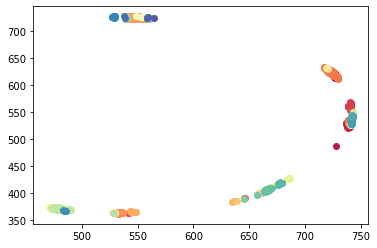

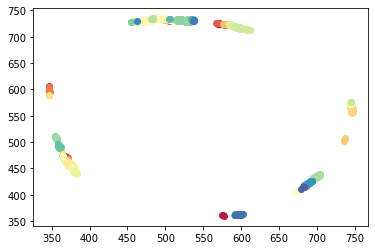

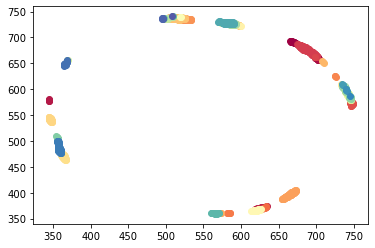

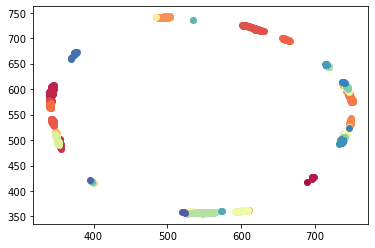

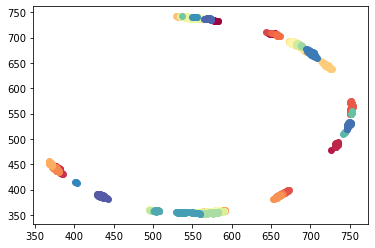

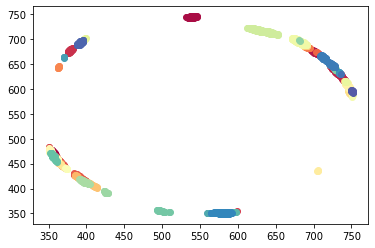

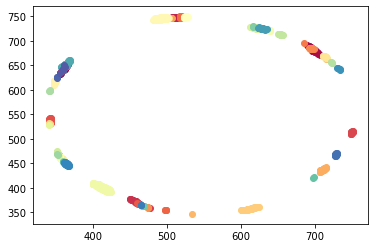

In [193]:
cmap = matplotlib.cm.get_cmap('Spectral')
%matplotlib inline
max_plots = 3050
min_plots = 3000
for j,clusters in enumerate(cl_coll[5]):
    plt.figure()
    for cidx in range(min_plots, max_plots):
        for cnt,idx in enumerate(clusters[cidx]):
            shade = (cidx-min_plots)/(max_plots-min_plots)
            if(cnt == 0):
                plt.scatter(x_dict[idx],y_dict[idx],color=cmap(shade),label='(%i,%i)'%(clusters[cidx][0],clusters[cidx][-1]))
            else:
                plt.scatter(x_dict[idx],y_dict[idx],color=cmap(shade))
    plt.show()